Suppose that a time variant function $u:[0,T]\times \mathbb{R}\rightarrow \mathbb{R}$ satisfies a parabolic partial differential equation
$$
\partial_t u + \mu(x, t)\partial_x u+\frac{1}{2}\sigma^2(x,t)\partial_{xx}^2 u-V(x,t)u + f(x,t) = 0,
$$
with the termination condition
$$
u(x, T) = \varphi(x).
$$
The Feynman-Kac formula reveals a surprising connection between PDEs and stochastic processes, by expressing the solution of above equation in a conditional expectation of a series of random walks, namely
$$
u(x,t) = \mathbb{E}\left[ \left. \int_t^T e^{-\int_t^r V(X_\tau, \tau) d\tau}
f(X_r, r)dr +  e^{-\int_r^T V(X_\tau, \tau)d\tau }\varphi(X_T) \right\vert X_t = x\right],
$$
where $X_t$ is a stochastic process (a.k.a Ito process) governed by a
stochastic partial differential equation (SPDE)
$$
dX_t =\mu(X,t)dt + \sigma(X,t)dW,
$$
where $W(t)$ is a Wiener process.


In financial theory, the celebrated Black-Scholes equation is also a parabolic PDE, which is used to describe how the 
price of an European-style option is evolved over time subject to the stock's price. Its dynamics is formulated by
$$
\partial_t V + \frac{1}{2}\sigma^2S^2\partial^2_{SS}V + rS \partial_S V -rV = 0,
$$
where $V(t)$ and $S(t)$ denote the price of an option and current stock respectively. The constant $r$ represents for the risk-free interest rate, while $\sigma$ is the standard derivation of stock's returns. The termination condition for a call option is put as
$$
\varphi(S, T) = \max(S-K, 0),
$$
where $T$ is the expiration date and $K$ is the strike price. Solving Black-Scholes with this condition eventually leads to the Black-Scholes formula for pricing a call option, i.e.
$$
V(S, t) = SN(d_1)-Ke^{-r(T-t)}N(d_2),
$$
with
$$
d_1 = \frac{\frac{\ln S}{K}+(r+\frac{\sigma^2}{2})(T-t)}{\sigma\sqrt{T-t}}, d_2 = d_1-\sigma \sqrt{T-t},
$$
and $N$ is the standard normal distribution function.

On the other side, we note that the BS equation can be also numerically solved using Monte Carlo method by applying above Feynman-Kac formula. Regarding a constant $V$ and a vanishing $f$ suggested by the BS equation, the ultimate pricing solution of a call option can be written as
$$
V(S, t) = e^{-r(T-t)}\mathbb{E}[\varphi(S_T)|S_t=S],
$$
where the stochastic process $S_t$ is driven by
$$
dS_t = rS_tdt + \sigma S_t dW,
$$
which is generally referred to a geometric Brownian motion with drift $r$ and volatility $\sigma$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

sigma = 0.4 # volatility
r = 0.02    # risk-free interest rate  
K = 140     # strike price
T = 1.0     # expiration date

h = 0.001   # time step for MC simulation

In [2]:
def N(x):
    """ standard normal distribution function """
    return 0.5*(1.0+math.erf(x/np.sqrt(2.0)))

In [3]:
def varphi(x):
    """ call option termination condition """
    return max(x-K, 0)

In [4]:
def BS_formula(S, t):
    """ Black-Scholes formula """
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    d2 = d1-sigma*np.sqrt(T-t)
    return S*N(d1)-K*np.exp(-r*(T-t))*N(d2)

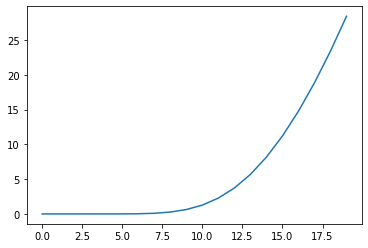

In [5]:
t = 0.1
S = np.linspace(0.5, 150, 20)

BS_formula_v = np.vectorize(BS_formula)
V = BS_formula_v(S, t)
plt.plot(V)

In [6]:
def sim_GBM_walk(S, t):
    """simuate a path of geometric Brownian motion"""
    curr_S = S
    curr_t = t
    while curr_t < T:
        rd = np.random.normal(0, 1)
        curr_S = curr_S*np.exp((r-0.5*sigma**2)*h+sigma*np.sqrt(h)*rd)
        curr_t += h
    return varphi(curr_S)

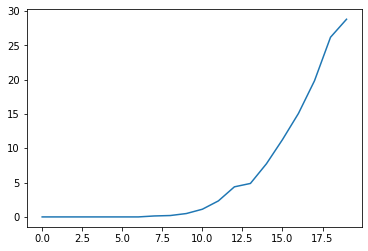

In [7]:
def MC_simulate(S, t, iters):
    """Monte Carlo integration"""
    return np.exp(-r*(T-t))*np.mean([sim_GBM_walk(S, t) for k in range(0, iters)])

MC_simulate_v = np.vectorize(MC_simulate)
VV = MC_simulate_v(S, t, 1000)
plt.plot(VV)